# Funciones de distribución de probabilidades

## Distribución Uniforme

In [1]:
%config IPCompleter.greedy=True

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## a debe ser menor que b
a = 1 
b = 100
n = 1000000
df = np.random.uniform(a,b,n)

In [4]:
%matplotlib inline

(array([100069.,  99879., 100089., 100196.,  99856.,  99629.,  99925.,
        100407.,  99953.,  99997.]),
 array([ 1.00001949, 10.89999552, 20.79997154, 30.69994757, 40.59992359,
        50.49989962, 60.39987564, 70.29985167, 80.19982769, 90.09980372,
        99.99977974]),
 <a list of 10 Patch objects>)

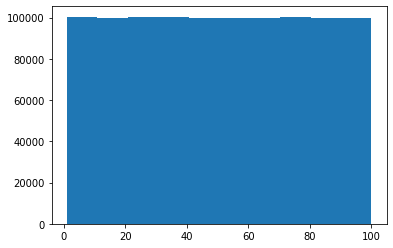

In [5]:
plt.hist(df)

## Distribución Normal

In [6]:
df2 = np.random.randn(1000000)

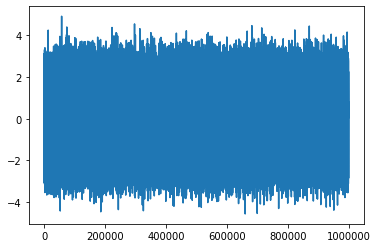

In [7]:
x = range(1,1000001)
plt.plot(x, df2)

(array([1.50000e+02, 3.64200e+03, 3.85520e+04, 1.77325e+05, 3.49386e+05,
        2.99580e+05, 1.12043e+05, 1.80300e+04, 1.26400e+03, 2.80000e+01]),
 array([-4.56285557, -3.61521861, -2.66758165, -1.71994469, -0.77230773,
         0.17532923,  1.1229662 ,  2.07060316,  3.01824012,  3.96587708,
         4.91351404]),
 <a list of 10 Patch objects>)

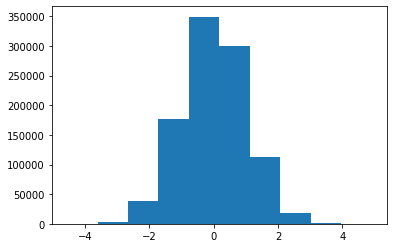

In [8]:
plt.hist(df2)

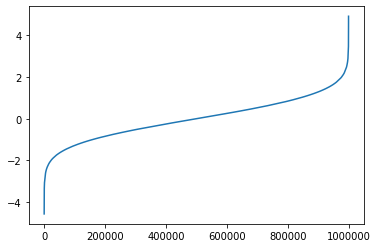

In [9]:
plt.plot(x, sorted(df2))

(array([   6.,   65.,  374., 1445., 2845., 3004., 1680.,  503.,   69.,
           9.]),
 array([-4.78037593, -2.74861708, -0.71685823,  1.31490062,  3.34665947,
         5.37841832,  7.41017717,  9.44193602, 11.47369487, 13.50545372,
        15.53721257]),
 <a list of 10 Patch objects>)

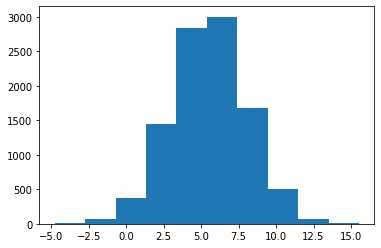

In [10]:
mu = 5.5
sd = 2.5
df3 = mu + sd * np.random.randn(10000) # Z = (X - mu) / sd -> N(0, 1), X = mu + sd * Z
plt.hist(df3)

In [11]:
df4 = np.random.randn(2, 4)
df4

array([[ 0.12600885,  0.20689351,  0.42579128, -1.0697338 ],
       [-1.5685724 ,  0.50574465,  0.46909871, -0.60356368]])

# La simulación de Monte Carlo

1. Generamos dos números aleatorios x e y entre 0 y 1
* Calcularemos x * x + y * y
    * Si el valor es inferior a 1 -> estamos dentro del circulo
    * Si el valor es superior a 1 -> estamos fuera del circulo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del circulo
* Usamos dicha probabilidad para aproximar el valor de PI.
* Repetimos el experimento un número suficiente de veces, para obtener diferentes aproximaciones de PI
* Calculamos el promedio de los 1000 experimentos anteriores para un valor final de PI

In [26]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_values_list = []
    for i in range(n_exp): ## Número de experimentos
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_values_list.append(pi_value)
        pi_avg += pi_value
        
    pi = pi_avg/n_exp
    
    fig = plt.plot(pi_values_list)
    return (pi, fig)

(3.141400000000002, [<matplotlib.lines.Line2D at 0x46880d0>])

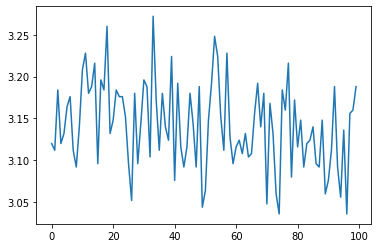

In [37]:
pi_montecarlo(1000, 100)

## Dummy Data Sets

In [6]:
n = 1000000
df5 = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.rand(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [7]:
df5.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.001304,2.750016,18.511509
std,1.000098,0.721417,7.794916
min,-5.102183,1.500001,5.000127
25%,-0.673392,2.125466,11.752652
50%,0.002045,2.750064,18.518129
75%,0.674514,3.374735,25.260961
max,4.991812,3.999999,31.999998


(array([2.90000e+01, 9.95000e+02, 1.80680e+04, 1.24219e+05, 3.33725e+05,
        3.53257e+05, 1.44517e+05, 2.36850e+04, 1.46900e+03, 3.60000e+01]),
 array([-5.10218347, -4.09278387, -3.08338428, -2.07398469, -1.0645851 ,
        -0.05518551,  0.95421408,  1.96361368,  2.97301327,  3.98241286,
         4.99181245]),
 <a list of 10 Patch objects>)

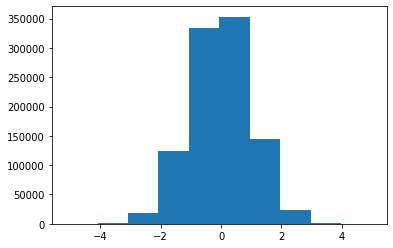

In [8]:
plt.hist(df5["A"])

(array([ 99571., 100334.,  99915.,  99540.,  99999., 100016., 100082.,
         99993., 100161., 100389.]),
 array([ 5.00012735,  7.70011442, 10.4001015 , 13.10008857, 15.80007565,
        18.50006273, 21.2000498 , 23.90003688, 26.60002395, 29.30001103,
        31.99999811]),
 <a list of 10 Patch objects>)

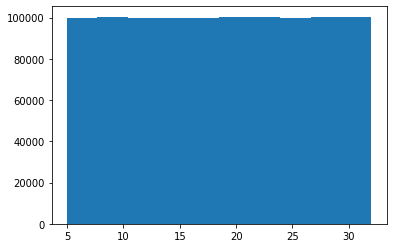

In [11]:
plt.hist(df5["C"])

In [12]:
df6 = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [13]:
df6.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [15]:
column_names = df6.columns.values.tolist()

In [17]:
a = len(column_names)
a

21

In [20]:
new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0, 1, a)
    }, index = range(42, 42 + a)
)

In [21]:
new_data

,Column Name,A,B
42,State,0.584264,0.292996
43,Account Length,0.122251,0.277504
44,Area Code,1.930710,0.601309
45,Phone,1.318410,0.436738
46,Int'l Plan,-0.371721,0.852346
47,VMail Plan,1.220215,0.529996
48,VMail Message,0.053312,0.314567
49,Day Mins,0.309695,0.776556
50,Day Calls,-0.213339,0.924455
51,Day Charge,-1.406744,0.423639
